# Part A: Data
# Introduction
This notebook contains all code that has been used to prepare the EStreams and other data for the analysis performed in the "How landscape data quality affects our perception of dominant processes in large-sample hydrology studies?" paper by do Nascimento et al. (in review). To be able to run this notebook, please ensure that you have downloaded the acompanying data of the paper. All links can be found in the data section of the paper.

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=Warning)


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Set the directory:
os.chdir(PATH)

In [3]:
path_estreams = r'C:\Users\nascimth\Documents\data\EStreams'

# Import data

### - Network information

In [4]:
network_estreams = pd.read_csv(path_estreams+'/streamflow_gauges/estreams_gauging_stations.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)

# Convert 'date_column' and 'time_column' to datetime
network_estreams['start_date'] = pd.to_datetime(network_estreams['start_date'])
network_estreams['end_date'] = pd.to_datetime(network_estreams['end_date'])

network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


In [5]:
network_estreams_filtered_quality_eobs = pd.read_csv('results/network_estreams_filtered_quality_eobs_8367.csv', encoding='utf-8')
network_estreams_filtered_quality_eobs.set_index("basin_id", inplace = True)

network_estreams_filtered_quality_eobs

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
FR004196,O419433002,Le Gijou Ã Vabre,FR,FR_EAUFRANCE,Le Gijou à Vabre,2.426336,43.694003,2.426336,43.694003,NaN,...,4063,1166.0,0.0,626.0,12019.0,C,['FR004195'],541,1,['FR004196']
DEBW0240,Hopfau Glatt,Hopfau Glatt,DE,DE_BW,NaN,8.578456,48.371265,8.578456,48.371265,430.15,...,15684,0.0,0.0,15684.0,0.0,B,NaN,1,1,['DEBW0240']
CZ000507,456510,Jedovnice-pila,CZ,CZ_CHMU,Jedovnický potok,16.739878,49.333322,16.739878,49.333322,NaN,...,11383,0.0,0.0,11383.0,0.0,B,NaN,2,2,"['CZ000506', 'CZ000507']"
CH000167,2488,Latterbach,CH,CH_CAMELS,Simme,7.580000,46.660000,7.580000,46.660000,667,...,13363,0.0,0.0,13363.0,0.0,B,NaN,1,3,"['CH000049', 'CH000073', 'CH000167']"
FR002102,R233505001,R2335050,FR,FR_EAUFRANCE,La Touvre [résurgence] à Gond-Pontouvre [Foulp...,0.168410,45.673266,0.168410,45.673266,31,...,7413,401.0,12731.0,0.0,2847.0,C,NaN,742,5,"['FR002099', 'FR002100', 'FR002101', 'FR002102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES001046,8148,JERICA,ES,ES_CEDEX,NaN,-0.545349,39.894130,-0.545349,39.894130,410,...,4748,0.0,0.0,4748.0,0.0,B,NaN,582,1,['ES001046']
DK000407,51000041,NV FOR STRANDGÅRD,DK,DK_ODA,TRUELSBÆK,11.768011,55.653172,11.768011,55.653172,NaN,...,365,0.0,365.0,0.0,0.0,A,NaN,317,1,['DK000407']
GB000521,63001,Ystwyth at Pont Llolwyn,GB,GB_NRFA,Ystwyth at Pont Llolwyn,-4.070000,52.380000,-4.070000,52.380000,12,...,9568,32.0,0.0,21153.0,0.0,B,NaN,1117,2,"['GB000522', 'GB000521']"


In [6]:
#network_estreams_filtered_quality_eobs = network_estreams_filtered_quality_eobs[network_estreams_filtered_quality_eobs.gauge_country == "CZ"]
#
#network_estreams_filtered_quality_eobs

In [7]:
#list_catchments1 = pd.read_csv('data/catchment_list.txt', encoding='utf-8', header=None)
#list_catchments2 = pd.read_csv('data/catchment_list_DK.txt', encoding='utf-8', header=None)
#
#list_catchments = pd.concat([list_catchments1, list_catchments2], ignore_index=True) 
#
#
#catchment_list = list_catchments.iloc[:, 0].tolist()  # Assuming there's only one column
#catchment_list

In [8]:
#catchment_list_CZ = network_estreams_filtered_quality_eobs.index.tolist()
#
#catchment_list = catchment_list + catchment_list_CZ
#
#catchment_list

In [10]:
#network_estreams_filtered = network_estreams.loc[catchment_list]
network_estreams_filtered = network_estreams_filtered_quality_eobs
network_estreams_filtered

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
FR004196,O419433002,Le Gijou Ã Vabre,FR,FR_EAUFRANCE,Le Gijou à Vabre,2.426336,43.694003,2.426336,43.694003,NaN,...,4063,1166.0,0.0,626.0,12019.0,C,['FR004195'],541,1,['FR004196']
DEBW0240,Hopfau Glatt,Hopfau Glatt,DE,DE_BW,NaN,8.578456,48.371265,8.578456,48.371265,430.15,...,15684,0.0,0.0,15684.0,0.0,B,NaN,1,1,['DEBW0240']
CZ000507,456510,Jedovnice-pila,CZ,CZ_CHMU,Jedovnický potok,16.739878,49.333322,16.739878,49.333322,NaN,...,11383,0.0,0.0,11383.0,0.0,B,NaN,2,2,"['CZ000506', 'CZ000507']"
CH000167,2488,Latterbach,CH,CH_CAMELS,Simme,7.580000,46.660000,7.580000,46.660000,667,...,13363,0.0,0.0,13363.0,0.0,B,NaN,1,3,"['CH000049', 'CH000073', 'CH000167']"
FR002102,R233505001,R2335050,FR,FR_EAUFRANCE,La Touvre [résurgence] à Gond-Pontouvre [Foulp...,0.168410,45.673266,0.168410,45.673266,31,...,7413,401.0,12731.0,0.0,2847.0,C,NaN,742,5,"['FR002099', 'FR002100', 'FR002101', 'FR002102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES001046,8148,JERICA,ES,ES_CEDEX,NaN,-0.545349,39.894130,-0.545349,39.894130,410,...,4748,0.0,0.0,4748.0,0.0,B,NaN,582,1,['ES001046']
DK000407,51000041,NV FOR STRANDGÅRD,DK,DK_ODA,TRUELSBÆK,11.768011,55.653172,11.768011,55.653172,NaN,...,365,0.0,365.0,0.0,0.0,A,NaN,317,1,['DK000407']
GB000521,63001,Ystwyth at Pont Llolwyn,GB,GB_NRFA,Ystwyth at Pont Llolwyn,-4.070000,52.380000,-4.070000,52.380000,12,...,9568,32.0,0.0,21153.0,0.0,B,NaN,1117,2,"['GB000522', 'GB000521']"


In [11]:
network_estreams_filtered.groupby('gauge_country').size()

gauge_country
AT     534
CH     225
CZ     477
DE    1724
DK     546
ES     950
FR    3031
GB     646
IS      69
SE     165
dtype: int64

In [12]:
import tqdm as tqdm 

In [13]:
import pandas as pd
import os
import shutil
import zipfile

In [ ]:
# Dictionary to store NaN counts per basin_id
nan_counts_dict = {}

for basin_id in tqdm.tqdm(network_estreams_filtered.index):
    data = pd.read_csv(path_estreams+"\\data\estreams_timeseries_"+basin_id+".csv", index_col=0)

    #data["q_mean"] = timeseries_estreams[basin_id]
    #data.to_csv(r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Data\data"+"\estreams_timeseries_"+basin_id+".csv")

    output_folder = f"results\hbv\{basin_id}"  # Folder named after the basin_id
    txt_filename = os.path.join(output_folder, "ptq_estreams.txt")
    txt_filename_evap = os.path.join(output_folder, "evap_estreams.txt")

    zip_filename = f"results\hbv\{basin_id}.zip"

    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Ensure the required columns exist
    required_columns = ["p_mean", "t_mean", "q_mean"]
    df_selected = data[required_columns].copy()

    df_selected.index = pd.to_datetime(df_selected.index)

    df_selected = df_selected.loc["01-10-1990":"30-09-2015"]

    # Format the date index to YYYYMMDD
    df_selected.insert(0, "date", df_selected.index.strftime("%Y%m%d"))

    df_selected.columns = ["Date", "P", "T", "Q"]

    df_pet = data["pet_mean"].copy()

    # Count NaN values in P and T
    nan_counts_dict[basin_id] = {
        "P": df_selected["P"].isna().sum(),
        "T": df_selected["T"].isna().sum(),
        "evap": df_pet.isna().sum(),
        "Q": df_selected["Q"].isna().sum()
        }
    
    # Interpolate when needed:
    #df_selected['P'] = df_selected['P'].interpolate()
    #df_selected['T'] = df_selected['T'].interpolate()
    #df_selected["Q"].fillna(-9999, inplace=True)
    #df_pet = df_pet.interpolate()

    ## Save the formatted data to ptq_estreams.txt (tab-separated, no header)
    #df_selected.to_csv(txt_filename, sep="\t", header=True, index=False)


    #df_pet.index = pd.to_datetime(df_pet.index)
    #df_pet = df_pet.loc["01-10-1990":"30-09-2015"]
    ## Convert Series to DataFrame and rename column
    #df_pet = df_pet.to_frame(name=f"basin.{basin_id}")    
    #
    #df_pet.to_csv(txt_filename_evap, sep="\t", header=True, index=False)

    ## Create a zip archive of the folder
    #with zipfile.ZipFile(zip_filename, "w", zipfile.ZIP_DEFLATED) as zipf:
    #    for root, _, files in os.walk(output_folder):
    #        for file in files:
    #            file_path = os.path.join(root, file)
    #            zipf.write(file_path, os.path.relpath(file_path, output_folder))

    ## Remove the uncompressed folder after zipping (optional)
    #shutil.rmtree(output_folder)

# Convert dictionary to DataFrame
nan_counts_df = pd.DataFrame.from_dict(nan_counts_dict, orient="index").reset_index()
nan_counts_df.rename(columns={"index": "basin_id"}, inplace=True)

nan_counts_df.to_csv(r"results\nan_counts_df.csv")

 63%|██████▎   | 5259/8367 [11:42<06:01,  8.60it/s]

In [18]:
nan_counts_df

,basin_id,P,T,evap,Q
0,AT000002,0,0,0,0
1,AT000003,0,0,0,0
2,AT000005,0,0,0,0
3,AT000007,0,0,0,0
4,AT000010,0,0,0,2
...,...,...,...,...,...
3341,CZ000088,0,0,0,0
3342,CZ000288,0,0,0,0
3343,CZ000103,0,0,0,0
3344,CZ000253,0,0,0,0


In [56]:
nan_counts_df[nan_counts_df.evap > 11].tail(10)

,basin_id,P,T,evap,Q
2796,GB000668,0,1,145,0
2797,GB000669,0,0,58,0
2798,GB000671,0,1,42,0
2799,IS000003,0,0,2221,634
2800,IS000013,0,0,1680,374
2801,IS000077,0,0,1766,588
2802,IS000093,0,0,1903,603
2804,SE000005,0,0,12,0
2813,SE000025,0,0,1250,0
2822,SE000066,0,0,6264,0


<Axes: >

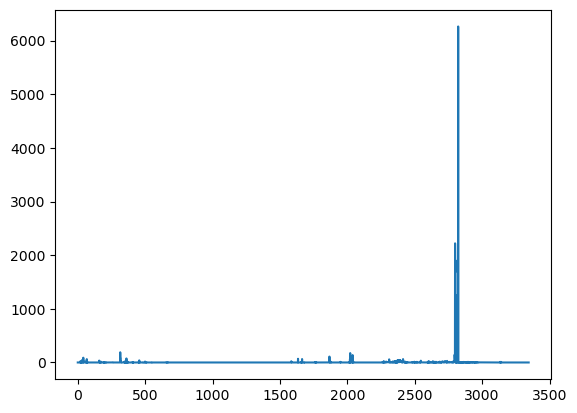

In [51]:
nan_counts_df["evap"].plot()

# End